In [55]:
# Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [27]:
# Store filepath in a variable
sleep_file = "Resources/Sleep_Efficiency.csv"
sleep_df = pd.read_csv(sleep_file)

In [28]:
# Show the first five rows.
sleep_df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [12]:
# Population Description
# Pie chart 
# Gender/Age
# #of smokers
# Charles


In [13]:
# Summary
# Average of all numerical values
# Bar Chart
# Awakenings
# # of smokers
# Scatterplots - Age v/s Exercise,Alcohol Consumption
# Pankaj


In [14]:
# Factors affecting sleep 1
# Edgar

In [29]:
# Show the dropna.
clean_sleep = sleep_df.dropna()
clean_sleep

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,30,Female,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [30]:
age = clean_sleep["Age"]
age

0      65
1      69
2      40
3      40
4      57
       ..
445    30
447    27
448    52
450    45
451    18
Name: Age, Length: 388, dtype: int64

In [31]:
age_min = clean_sleep.loc[(clean_sleep["Age"]).min()]
age_min

ID                                         10
Age                                        11
Gender                                 Female
Bedtime                   2021-09-16 01:00:00
Wakeup time               2021-09-16 10:00:00
Sleep duration                            9.0
Sleep efficiency                         0.55
REM sleep percentage                       18
Deep sleep percentage                      37
Light sleep percentage                     45
Awakenings                                4.0
Caffeine consumption                      0.0
Alcohol consumption                       0.0
Smoking status                             No
Exercise frequency                        0.0
Name: 9, dtype: object

In [32]:
# Create a copy of the school summary since it has the "Per Student Budget" 
clean_sleep_df = clean_sleep.copy()
clean_sleep_df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,30,Female,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [33]:
age_max = clean_sleep.loc[(clean_sleep["Age"]).max()]
age_max

ID                                         70
Age                                        40
Gender                                   Male
Bedtime                   2021-09-23 22:00:00
Wakeup time               2021-09-23 04:00:00
Sleep duration                            6.0
Sleep efficiency                         0.52
REM sleep percentage                       20
Deep sleep percentage                      35
Light sleep percentage                     45
Awakenings                                2.0
Caffeine consumption                      0.0
Alcohol consumption                       2.0
Smoking status                            Yes
Exercise frequency                        3.0
Name: 69, dtype: object

In [34]:
# Establish the bins 
age_bins = [15, 25, 35, 45, 55, 65, 75]
labels = ["<20", "20-30", "30-40", "40-50", "50-60","60-70"]
age_bins
labels

['<20', '20-30', '30-40', '40-50', '50-60', '60-70']

In [35]:
# Use `pd.cut` to categorize age based on the bins.
clean_sleep_df["Age Ranges"] = pd.cut(age,age_bins,labels=labels,include_lowest=True)
clean_sleep_df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age Ranges
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,50-60
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,60-70
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,30-40
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,30-40
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,30,Female,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0,20-30
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0,20-30
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0,40-50
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0,30-40


In [36]:
#  Calculate averages for the desired columns. 
age_mean = clean_sleep_df.groupby(["Age Ranges"]).mean()["Age"]
#spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Reading Score"]
#spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Math"]
#spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Reading"]
#overall_passing_spending = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Overall Passing"]
#spending_math_scores
#spending_reading_scores
#spending_passing_math
#spending_passing_reading
#overall_passing_spending
age_mean

Age Ranges
<20      22.176471
20-30    29.747126
30-40    40.059524
40-50    50.676471
50-60    60.185185
60-70    67.500000
Name: Age, dtype: float64

In [60]:
# Factors affecting sleep 2
# Kanwal TEST

#Bar_Chart = clean_sleep_df.plot(kind='bar', x='Age Ranges', y='Sleep duration', legend=False)
# set the title and axis labels
#Bar_Chart.set_title('Sleep Duration and Age Pattern')
#Bar_Chart.set_xlabel('Age')
#Bar_Chart.set_ylabel('Sleep Duration')

# show the plot
#plt.show()
#plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

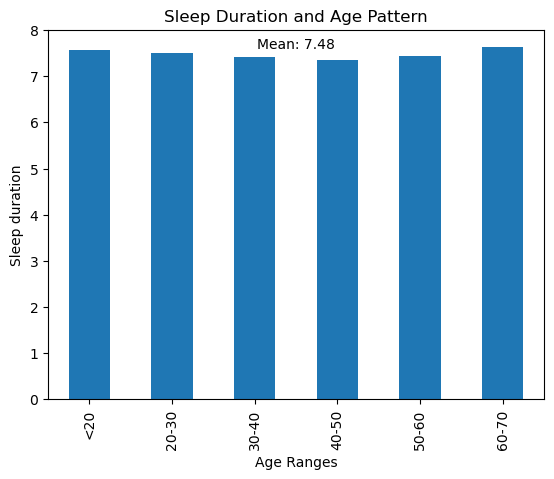

In [49]:
# group the data by age ranges and calculate the mean sleep duration for each group
age_mean = clean_sleep_df.groupby('Age Ranges')['Sleep duration'].mean()

# create the bar chart
Bar_Chart = age_mean.plot(kind='bar', x='Age Ranges', y='Sleep duration', legend=False)

# set the title and axis labels
Bar_Chart.set_title('Sleep Duration and Age Pattern')
Bar_Chart.set_xlabel('Age Ranges')
Bar_Chart.set_ylabel('Sleep duration')

# add the mean value to the chart
mean_value = np.round(age_mean.mean(), 2)  

# calculate the mean of the mean values
Bar_Chart.annotate(f'Mean: {mean_value}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center')

plt.show


## Sleep Duration with Gender

<function matplotlib.pyplot.show(close=None, block=None)>

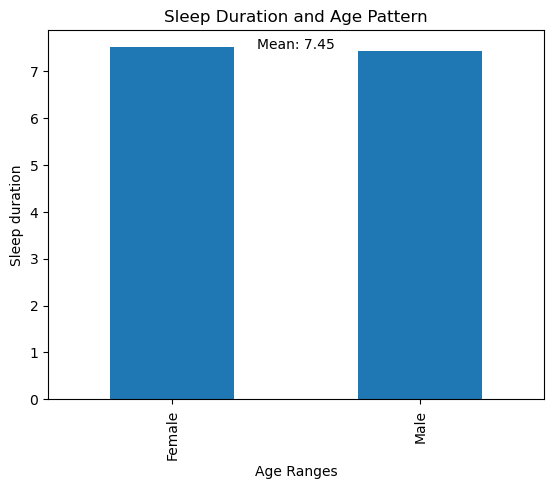

In [51]:

# group the data by age ranges and calculate the mean sleep duration for each group
age_mean = clean_sleep_df.groupby('Gender')['Sleep duration'].mean()

# create the bar chart
Bar_Chart = age_mean.plot(kind='bar', x='Gender', y='Sleep duration', legend=False)

# set the title and axis labels
Bar_Chart.set_title('Avg.Sleep Duration and Gender')
Bar_Chart.set_xlabel('Gender')
Bar_Chart.set_ylabel('Sleep duration')

# add the mean value to the chart
mean_value = np.round(age_mean.mean(), 2)  

# calculate the mean of the mean values
Bar_Chart.annotate(f'Mean: {mean_value}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center')

plt.show


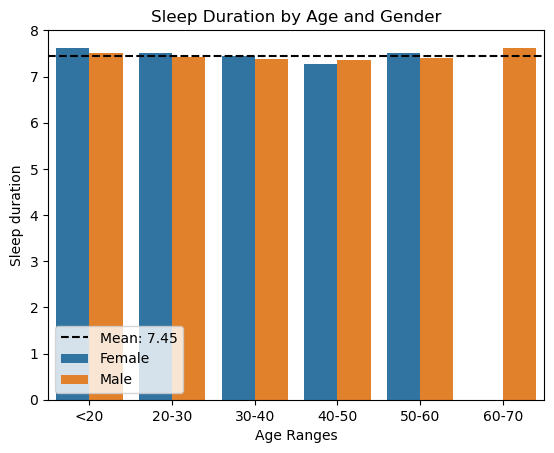

In [56]:
# group the data by age ranges and gender and calculate the mean sleep duration for each group
age_gender_mean = clean_sleep_df.groupby(['Age Ranges', 'Gender'])['Sleep duration'].mean().reset_index()

# create the bar chart
Bar_Chart = sns.barplot(x='Age Ranges', y='Sleep duration', hue='Gender', data=age_gender_mean)

# set the title and axis labels
Bar_Chart.set_title('Sleep Duration by Age and Gender')
Bar_Chart.set_xlabel('Age Ranges')
Bar_Chart.set_ylabel('Sleep duration')

# add the mean value to the chart
mean_value = np.round(clean_sleep_df['Sleep duration'].mean(), 2)  
# calculate the mean of the entire dataset
Bar_Chart.axhline(y=mean_value, color='black', linestyle='--', label=f'Mean: {mean_value}')
Bar_Chart.legend()

# show the plot
plt.show()

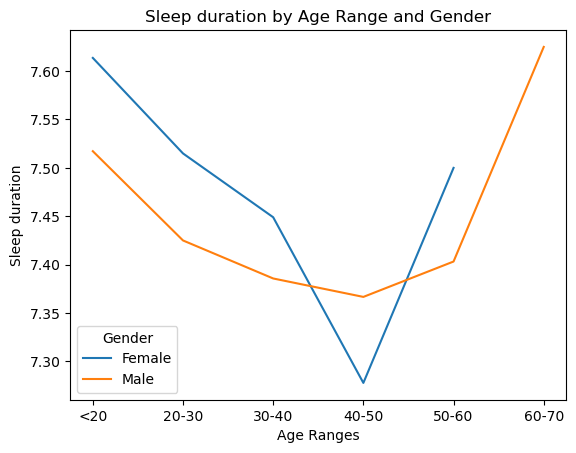

In [75]:
# create a pivot table to calculate the mean sleep efficiency for each age range and gender
sleep_pivot = clean_sleep_df.pivot_table(values='Sleep duration', index='Age Ranges', columns='Gender', aggfunc='mean')

# plot the pivot table as a line graph
sleep_pivot.plot(kind='line')

# set the title and axis labels
plt.title('Sleep duration by Age Range and Gender')
plt.xlabel('Age Ranges')
plt.ylabel('Sleep duration')

# show the plot
plt.show()

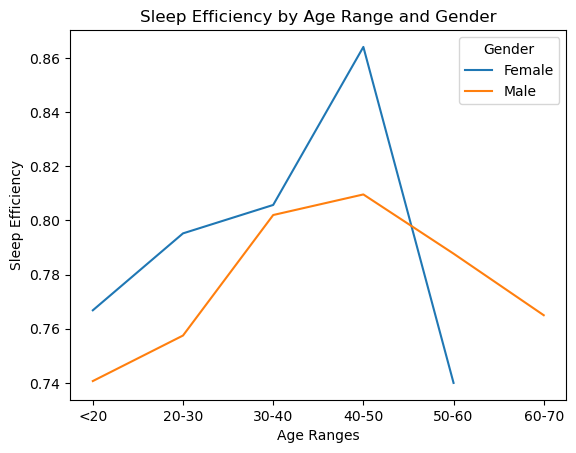

In [76]:
# create a pivot table to calculate the mean sleep efficiency for each age range and gender
sleep_pivot = clean_sleep_df.pivot_table(values='Sleep efficiency', index='Age Ranges', columns='Gender', aggfunc='mean')

# plot the pivot table as a line graph
sleep_pivot.plot(kind='line')

# set the title and axis labels
plt.title('Sleep Efficiency by Age Range and Gender')
plt.xlabel('Age Ranges')
plt.ylabel('Sleep Efficiency')

# show the plot
plt.show()

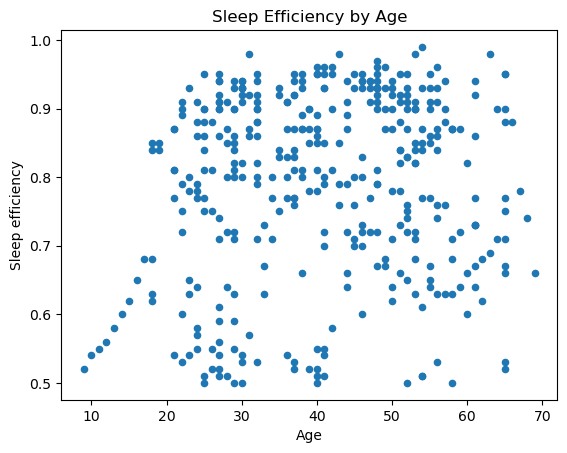

In [77]:
# Scatterplots
# Age vs. Sleep Efficiency
clean_sleep_df.plot(kind="scatter", x="Age", y="Sleep efficiency",
              title="Sleep Efficiency by Age")
plt.show()

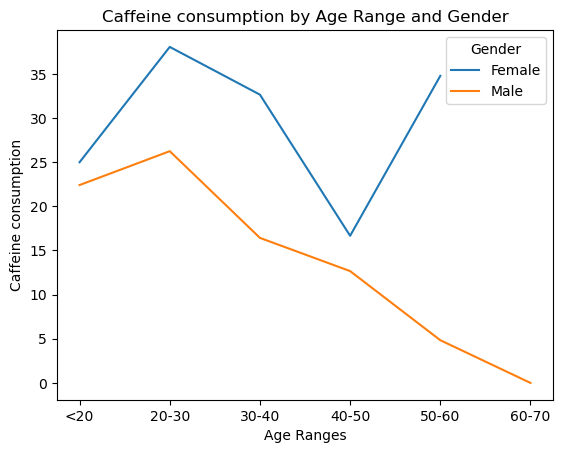

In [70]:
# create a pivot table to calculate the mean sleep efficiency for each age range and gender
sleep_pivot = clean_sleep_df.pivot_table(values='Caffeine consumption', index='Age Ranges', columns='Gender', aggfunc='mean')

# plot the pivot table as a line graph
sleep_pivot.plot(kind='line')

# set the title and axis labels
plt.title('Caffeine consumption by Age Range and Gender')
plt.xlabel('Age Ranges')
plt.ylabel('Caffeine consumption')

# show the plot
plt.show()

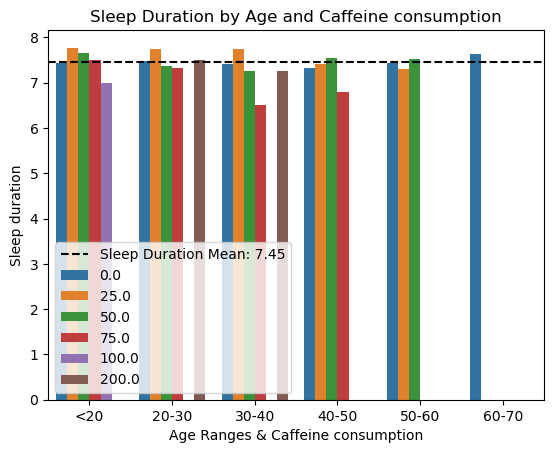

In [59]:
# group the data by age ranges and gender and calculate the mean sleep duration for each group
caffine_mean = clean_sleep_df.groupby(['Age Ranges', 'Caffeine consumption'])['Sleep duration'].mean().reset_index()

# create the bar chart
Bar_Chart = sns.barplot(x='Age Ranges', y='Sleep duration', hue='Caffeine consumption', data=caffine_mean)

# set the title and axis labels
Bar_Chart.set_title('Sleep Duration by Age and Caffeine consumption')
Bar_Chart.set_xlabel('Age Ranges & Caffeine consumption')
Bar_Chart.set_ylabel('Sleep duration')

# add the mean value to the chart
mean_value = np.round(clean_sleep_df['Sleep duration'].mean(), 2) 
# calculate the mean of the entire dataset
Bar_Chart.axhline(y=mean_value, color='black', linestyle='--', label=f'Sleep Duration Mean: {mean_value}')
Bar_Chart.legend()

# show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

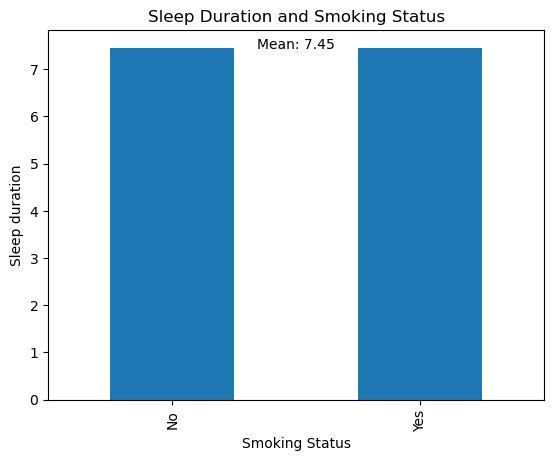

In [74]:
# group the data by age ranges and calculate the mean sleep duration for each group
age_mean = clean_sleep_df.groupby('Smoking status')['Sleep duration'].mean()

# create the bar chart
Bar_Chart = age_mean.plot(kind='bar', x='Smoking status', y='Sleep duration', legend=False)

# set the title and axis labels
Bar_Chart.set_title('Sleep Duration and Smoking Status')
Bar_Chart.set_xlabel('Smoking Status')
Bar_Chart.set_ylabel('Sleep duration')

# add the mean value to the chart
mean_value = np.round(age_mean.mean(), 2)  

# calculate the mean of the mean values
Bar_Chart.annotate(f'Mean: {mean_value}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center')

plt.show